In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm 
import scipy.stats as stats
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
college = pd.read_csv('Admission_Predict.csv')

In [3]:
college['GRE_precentile'] = college['GRE Score']*100/340
college['TOEFL_precentile'] = college['TOEFL Score']*100/120
college['CGPA_precentile'] = college['CGPA']*100/10
college['Cumulative']=college['University Rating']+college['SOP']+college['LOR ']
college['cumulative_percentile'] = college.Cumulative*100/15
college['Admit']= college['Chance of Admit ']*100
college.drop(['GRE Score', 'TOEFL Score', 'CGPA','Research','Cumulative','Chance of Admit ','University Rating',
             'SOP','LOR ','Serial No.'], axis = 1, inplace = True)

In [50]:
new = college[(college.Admit>53)&(college.Admit<90)]


In [64]:
new.head()

,GRE_precentile,TOEFL_precentile,CGPA_precentile,cumulative_percentile,Admit
1,95.294118,89.166667,88.7,83.333333,76.0
2,92.941176,86.666667,80.0,63.333333,72.0
3,94.705882,91.666667,86.7,60.000000,80.0
4,92.352941,85.833333,82.1,46.666667,65.0
6,94.411765,90.833333,82.0,66.666667,75.0


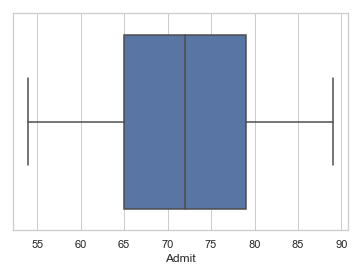

In [51]:
sns.boxplot(new.Admit)

In [52]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
x = new.drop(['Admit'], axis = 1)
x = sm.add_constant(x)
#scaled_x = scaler.fit_transform(x)
#pf = PolynomialFeatures(degree=2)
#X = pf.fit_transform(x)

In [53]:
y = new.Admit
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.30, random_state = 123)
model = sm.OLS(ytest,xtest).fit()
pred_model = model.predict(xtest)
fittedvalues = model.fittedvalues
residual = model.resid
rsquared = model.rsquared
print(rsquared)

0.7046974377386601


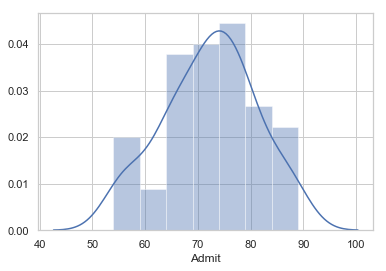

In [72]:
sns.distplot((ytest))

# Test of linearity

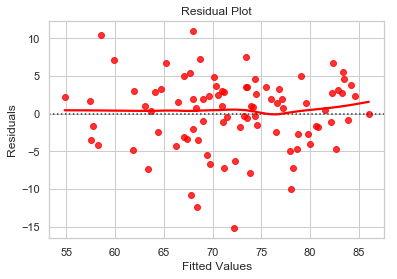

In [55]:
sns.set(style = 'whitegrid')
ax =sns.residplot(fittedvalues, residual, color='red',lowess = True) #local regression smoothing line, if false, no line will be seen
ax.set(xlabel ='Fitted Values', ylabel ='Residuals',title = 'Residual Plot')
plt.show()

In [56]:
from statsmodels.stats.api import linear_rainbow, het_goldfeldquandt
linear_rainbow(model)

(0.7909675451755781, 0.7780101623113258)

from rainbow test, Linearity test shows no pattern and hence data is linear 

# Q-Q plot

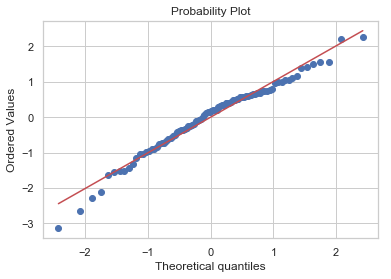

In [57]:
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist = 'norm', plot = pylab)
plt.show()

In [58]:
from scipy.stats import shapiro
shapiro(model.resid)

(0.9773344993591309, 0.1172342300415039)

In [59]:
het_goldfeldquandt(ytest, model.model.exog)

(0.5221513421379208, 0.9785458741668435, 'increasing')

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Admit   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     50.71
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           9.48e-22
Time:                        17:17:53   Log-Likelihood:                -267.97
No. Observations:                  90   AIC:                             545.9
Df Residuals:                      85   BIC:                             558.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -88.6559     18.479     -4.798      0.000    -125.398     -51.914
GRE_precentile            0.8628      0.266      3.241      0.002       0.334       1.392
TOEFL_precentile          0.2426      0.213      1.139      0.258      -0.181       0.666
CGPA_precentile           0.5721      0.188      3.040      0.003       0.198       0.946
cumulative_percentile     0.1602      0.043      3.756      0.000       0.075       0.245
==============================================================================
Omnibus:                        6.478   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.854
Skew:                          -0.541   Prob(JB):                       0.0536
Kurtosis:                       3.624   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,col) for col in range(0,x.shape[1])]
vif

,VIF Values
0,1482.841379
1,2.379697
2,2.452773
3,2.886035
4,1.910190


In [69]:
data=pd.DataFrame({'const':[1],'Gre_precentile': [85], 'Toefl_precentile': [80.1], 'cumulative_percentile':[80.4],'CGPA_precentiles':[85.5]})

In [70]:
model.predict(data)

0    63.808916
dtype: float64

In [73]:
new.head()

,GRE_precentile,TOEFL_precentile,CGPA_precentile,cumulative_percentile,Admit
1,95.294118,89.166667,88.7,83.333333,76.0
2,92.941176,86.666667,80.0,63.333333,72.0
3,94.705882,91.666667,86.7,60.000000,80.0
4,92.352941,85.833333,82.1,46.666667,65.0
6,94.411765,90.833333,82.0,66.666667,75.0
